In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs

In [2]:
data = make_blobs(n_samples = 200, n_features = 2, centers = 5, cluster_std = 1.7, random_state = 101)

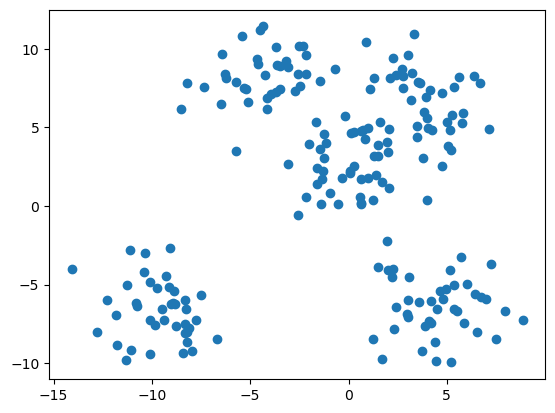

In [3]:
plt.scatter(data[0][:,0], data[0][:,1])

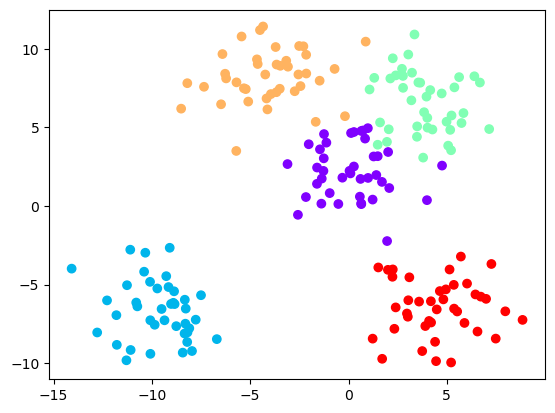

In [4]:
plt.scatter(data[0][:,0], data[0][:,1], c = data[1], cmap = "rainbow")

In [5]:
from sklearn.cluster import KMeans

In [6]:
model = KMeans(n_clusters = 5, n_init = 7)
model.fit(data[0])

KMeans(n_clusters=5, n_init=7)

In [7]:
model.cluster_centers_

array([[ 3.87630956e+00,  6.68824740e+00],
       [-9.66299260e+00, -6.61889804e+00],
       [ 4.48441388e+00, -6.34449060e+00],
       [-4.31922315e+00,  8.29261691e+00],
       [ 8.21042475e-03,  2.53236837e+00]])

In [8]:
model.labels_

array([0, 4, 2, 3, 2, 2, 2, 0, 3, 4, 4, 2, 1, 0, 0, 2, 4, 1, 4, 4, 4, 4,
       4, 1, 1, 4, 4, 2, 1, 0, 4, 3, 0, 0, 4, 1, 4, 3, 4, 2, 0, 1, 1, 0,
       4, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 4, 4, 0, 2, 0, 0, 3,
       2, 3, 0, 3, 1, 3, 2, 0, 0, 0, 4, 1, 2, 1, 3, 3, 4, 2, 4, 1, 3, 2,
       0, 4, 3, 4, 4, 0, 2, 3, 1, 1, 3, 1, 0, 2, 4, 1, 3, 2, 1, 3, 4, 1,
       4, 1, 3, 1, 0, 2, 0, 1, 4, 3, 2, 0, 0, 3, 2, 3, 3, 2, 4, 2, 4, 1,
       2, 2, 2, 4, 0, 0, 2, 0, 3, 3, 3, 1, 1, 0, 1, 3, 2, 3, 4, 1, 2, 2,
       2, 2, 4, 3, 1, 2, 4, 0, 3, 1, 0, 4, 2, 2, 1, 4, 4, 3, 3, 4, 3, 4,
       2, 3, 4, 2, 3, 3, 4, 3, 2, 1, 1, 0, 1, 1, 1, 0, 1, 4, 0, 0, 3, 3,
       1, 0])

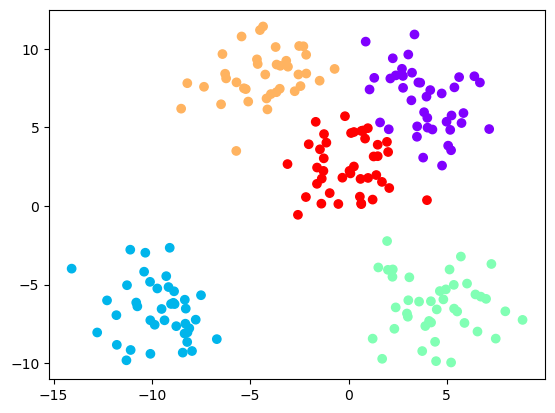

In [9]:
plt.scatter(data[0][:,0], data[0][:,1], c = model.labels_, cmap = "rainbow")

In [10]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init = 7)
    kmeans.fit(data[0])
    wcss.append(kmeans.inertia_)

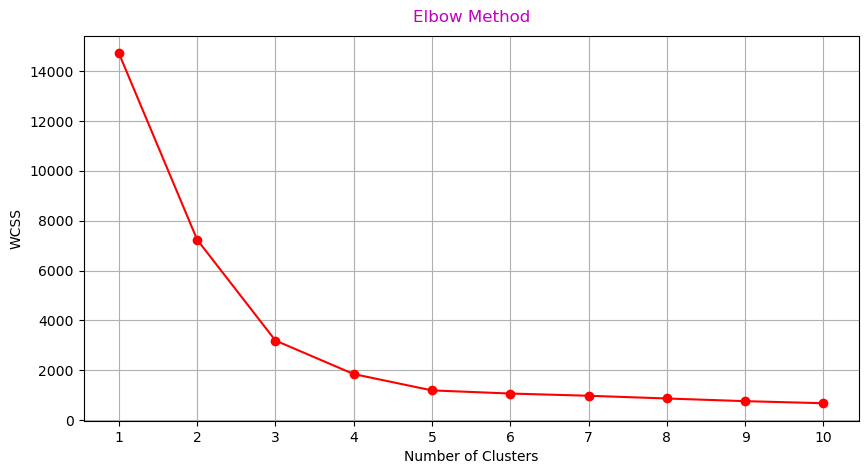

In [11]:
plt.figure(figsize = (10, 5))
plt.plot(range(1, 11), wcss, marker = "o", c = 'r')
plt.xticks(range(1, 11))
plt.title("Elbow Method", pad = 10, color = 'm')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init = 7)
    kmeans.fit(data[0])
    silhouette_scores.append(silhouette_score(data[0], kmeans.labels_))

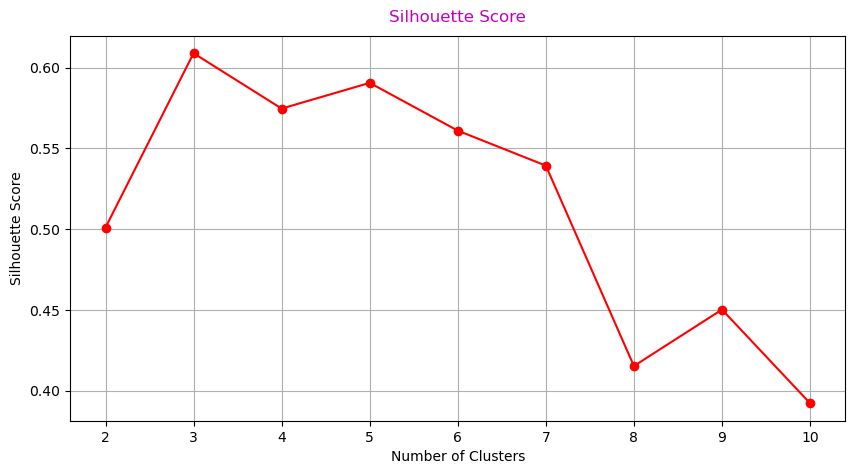

In [14]:
plt.figure(figsize = (10, 5))
plt.plot(range(2, 11), silhouette_scores, marker = "o", c = 'r')
plt.xticks(range(2, 11))
plt.title("Silhouette Score", pad = 10, color = 'm')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

In [15]:
kmeans.inertia_


697.218208062261

In [16]:
from sklearn.model_selection import RandomizedSearchCV

# defining parameter range
param_grid = {'n_clusters': [3],'init': ['k-means++', "randomly"],'n_init': [5,6,7,8,9], "max_iter":[300, 400], "tol":[0.0001, 0.0002]}

random_search = RandomizedSearchCV(KMeans(), param_grid, n_iter=20, refit=True, verbose=3)

# fitting the model for grid search
random_search.fit(data[0])


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END init=randomly, max_iter=300, n_clusters=3, n_init=9, tol=0.0002;, score=nan total time=   0.0s
[CV 2/5] END init=randomly, max_iter=300, n_clusters=3, n_init=9, tol=0.0002;, score=nan total time=   0.0s
[CV 3/5] END init=randomly, max_iter=300, n_clusters=3, n_init=9, tol=0.0002;, score=nan total time=   0.0s
[CV 4/5] END init=randomly, max_iter=300, n_clusters=3, n_init=9, tol=0.0002;, score=nan total time=   0.0s
[CV 5/5] END init=randomly, max_iter=300, n_clusters=3, n_init=9, tol=0.0002;, score=nan total time=   0.0s
[CV 1/5] END init=k-means++, max_iter=400, n_clusters=3, n_init=7, tol=0.0001;, score=-583.323 total time=   0.7s
[CV 2/5] END init=k-means++, max_iter=400, n_clusters=3, n_init=7, tol=0.0001;, score=-666.840 total time=   0.7s
[CV 3/5] END init=k-means++, max_iter=400, n_clusters=3, n_init=7, tol=0.0001;, score=-675.732 total time=   0.6s
[CV 4/5] END init=k-means++, max_iter=400, n_clusters=3,

[CV 4/5] END init=k-means++, max_iter=400, n_clusters=3, n_init=9, tol=0.0001;, score=-623.377 total time=   0.8s
[CV 5/5] END init=k-means++, max_iter=400, n_clusters=3, n_init=9, tol=0.0001;, score=-749.574 total time=   0.9s
[CV 1/5] END init=k-means++, max_iter=400, n_clusters=3, n_init=5, tol=0.0002;, score=-583.323 total time=   0.5s
[CV 2/5] END init=k-means++, max_iter=400, n_clusters=3, n_init=5, tol=0.0002;, score=-666.840 total time=   0.5s
[CV 3/5] END init=k-means++, max_iter=400, n_clusters=3, n_init=5, tol=0.0002;, score=-675.732 total time=   0.5s
[CV 4/5] END init=k-means++, max_iter=400, n_clusters=3, n_init=5, tol=0.0002;, score=-623.377 total time=   0.5s
[CV 5/5] END init=k-means++, max_iter=400, n_clusters=3, n_init=5, tol=0.0002;, score=-749.574 total time=   0.5s
[CV 1/5] END init=randomly, max_iter=400, n_clusters=3, n_init=7, tol=0.0002;, score=nan total time=   0.0s
[CV 2/5] END init=randomly, max_iter=400, n_clusters=3, n_init=7, tol=0.0002;, score=nan total

RandomizedSearchCV(estimator=KMeans(), n_iter=20,
                   param_distributions={'init': ['k-means++', 'randomly'],
                                        'max_iter': [300, 400],
                                        'n_clusters': [3],
                                        'n_init': [5, 6, 7, 8, 9],
                                        'tol': [0.0001, 0.0002]},
                   verbose=3)

In [17]:
# print best parameter after tuning
print(random_search.best_params_)

# print how our model looks after hyper-parameter tuning
print(random_search.best_estimator_)


{'tol': 0.0001, 'n_init': 7, 'n_clusters': 3, 'max_iter': 400, 'init': 'k-means++'}
KMeans(max_iter=400, n_clusters=3, n_init=7)


In [18]:
model = KMeans(n_clusters = 3, init = "k-means++", n_init = 5, max_iter = 300, tol = 0.0001)
model.fit(data[0])

KMeans(n_clusters=3, n_init=5)

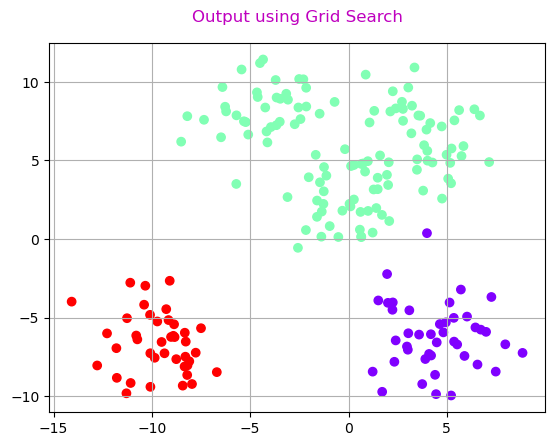

In [19]:
plt.scatter(data[0][:,0], data[0][:,1], c = model.labels_, cmap = "rainbow")
plt.grid()
plt.title("Output using Grid Search", pad = 15, c = "m")
plt.show()

In [20]:
x = KMeans()